In [5]:
import os
os.getcwd()


'C:\\Users\\Akshad Aulwar\\FUTURE_DS_03'

In [6]:
os.listdir()


['.ipynb_checkpoints',
 'bank+marketing.zip',
 'bank-additional',
 'bank-additional.zip',
 'bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank.zip',
 'Marketing Funnel & Conversion Performance Analysis.ipynb',
 '__MACOSX']

In [11]:
import pandas as pd
df = pd.read_csv("bank-full.csv", sep=";")

In [12]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
contacted = len(df)
leads = len(df[df['contact'] != 'unknown'])
customers = len(df[df['y'] == 'yes'])

contacted, leads, customers


(45211, 32191, 5289)

In [15]:
traffic_to_lead = (leads / contacted) * 100
lead_to_customer = (customers / leads) * 100

traffic_to_lead, lead_to_customer


(71.2016987016434, 16.430058090770714)

In [16]:
funnel = pd.DataFrame({
    "Stage": ["Contacted", "Leads", "Customers"],
    "Count": [contacted, leads, customers]
})

funnel


,Stage,Count
0,Contacted,45211
1,Leads,32191
2,Customers,5289


In [17]:
drop_contact_lead = 100 - traffic_to_lead
drop_lead_customer = 100 - lead_to_customer

drop_contact_lead, drop_lead_customer


(28.798301298356606, 83.56994190922929)

In [18]:
channel_perf = df.groupby('contact')['y'].value_counts(normalize=True).unstack() * 100
channel_perf


y,no,yes
contact,,
cellular,85.081100,14.918900
telephone,86.579491,13.420509
unknown,95.929339,4.070661


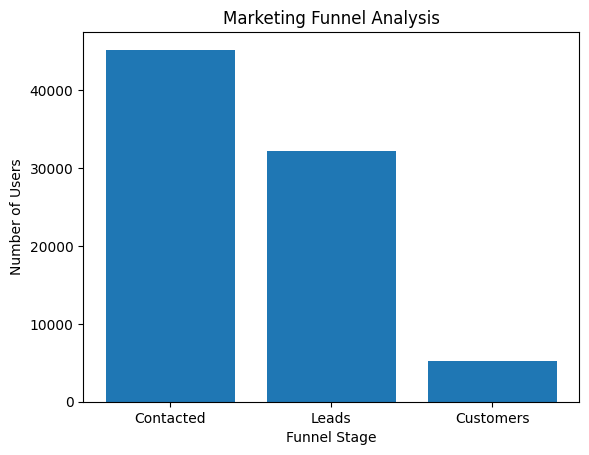

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(funnel['Stage'], funnel['Count'])
plt.title("Marketing Funnel Analysis")
plt.xlabel("Funnel Stage")
plt.ylabel("Number of Users")
plt.show()
